In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.layers import fully_connected
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from path import Path
import pandas as pd
#from lib.autoencoderReduction import AutoencoderReduction
from lib.autoencoderReduction import AutoencoderReduction

In [2]:
n_input = 3
n_hidden = 2
n_output = n_input

In [3]:
learning_rate = 0.01
X = tf.placeholder(tf.float32, shape=[None, n_input]) # X è una matrice che può avere un numero di righe qualsiasi e 3 colonne dove gli elementi sono float 32, X è un segna posto
hidden = fully_connected(X, n_hidden, activation_fn=tf.nn.sigmoid) #aggiungi il livello nascosto alla rete dove i nodi sono tutti connessi, non è stata specificata nessuna funzione di attivazione
outputs = fully_connected(hidden, n_output, activation_fn=None) #aggiungi il livello di outputs alla rete collegandola ad hidden, i nodi sono tutti collegati ai nodi del livello precedente (hidden), non è stata specificata nessuna funzione di attivazione


In [4]:
reconstruction_loss = tf.reduce_mean(tf.square(outputs-X)) #è il mean square error, tf_reduce_mean calcola la classica media
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)# usa come algoritmo di ottimizzazione per minimizzare la funzione di costo la Discesa stocastica del gradiente con il tasso di learning posto a 0.001
training_op = optimizer.minimize(reconstruction_loss) #imposto la funzione di loss da ottimizzare
init = tf.global_variables_initializer() # inizializza le variabili globali del grafo, è operazione che si deve fare sempre?

Computing LLE embedding
Done. Reconstruction error: 3.94369e-07


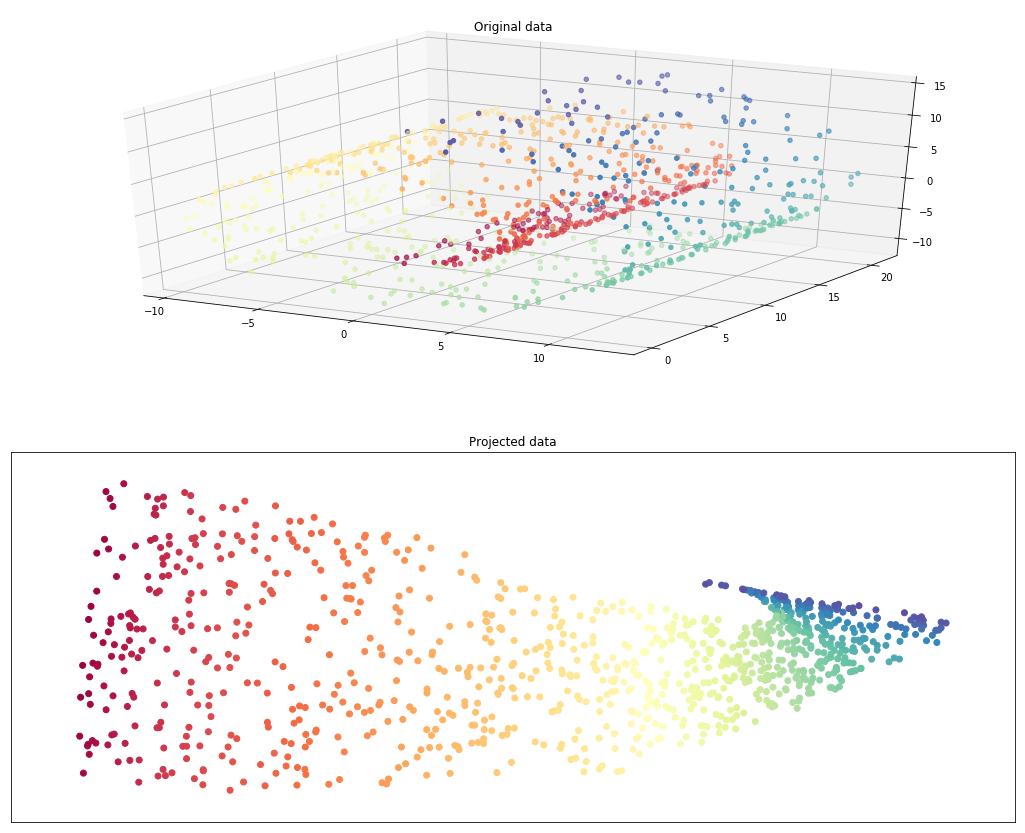

In [5]:
import matplotlib.pyplot as plt

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

#----------------------------------------------------------------------
# Locally linear embedding of the swiss roll

from sklearn import manifold, datasets
df, color = datasets.samples_generator.make_swiss_roll(n_samples=1000)

print("Computing LLE embedding")
X_r, err = manifold.locally_linear_embedding(df, n_neighbors=12,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)

#----------------------------------------------------------------------
# Plot result

fig = plt.figure(figsize=(18,15))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(df[:, 0], df[:, 1], df[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

In [6]:
SC = StandardScaler()
df_std = SC.fit_transform(df)
X_train, X_test = train_test_split(df_std, test_size = 0.3, random_state=42)
n_iterations = 1000
codings = hidden # the output of the hidden layer provides the codings
rappr_final = outputs
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X: X_train}) # no labels (unsupervised)
    codings_val = codings.eval(feed_dict={X: X_test})
    result = rappr_final.eval(feed_dict={X: X_test})

In [7]:
codings_val.shape

(300, 2)

In [8]:
AE_prova = AutoencoderReduction(n_inputs=X_train.shape[1], n_hidden=10,n_outputs=X_train.shape[1], learning_rate=0.01)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
latent_rep_prova, rec_pep_prova =AE_prova.fit_predict(epochs=1000, training_set=X_train, test_set=X_test)

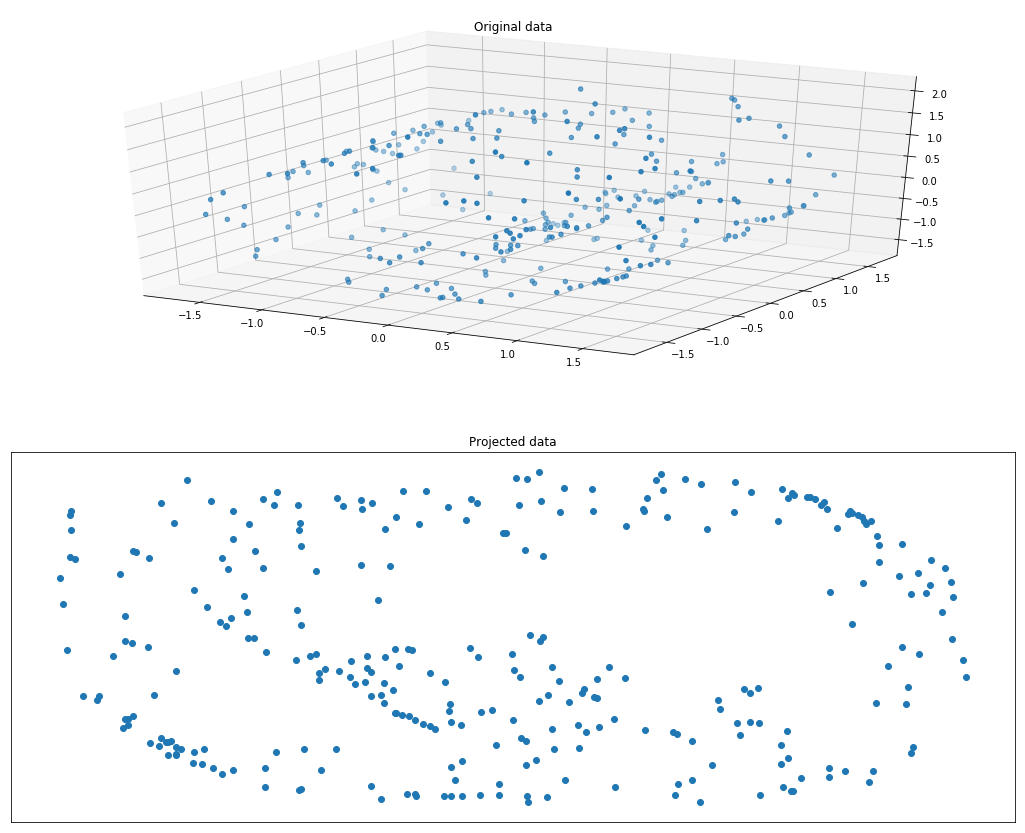

In [10]:
#----------------------------------------------------------------------
# Plot result

fig = plt.figure(figsize=(18,15))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(rec_pep_prova[:, 0], rec_pep_prova[:, 1], rec_pep_prova[:, 2])

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(codings_val[:, 0], codings_val[:, 1])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

In [11]:
result.shape

(300, 3)

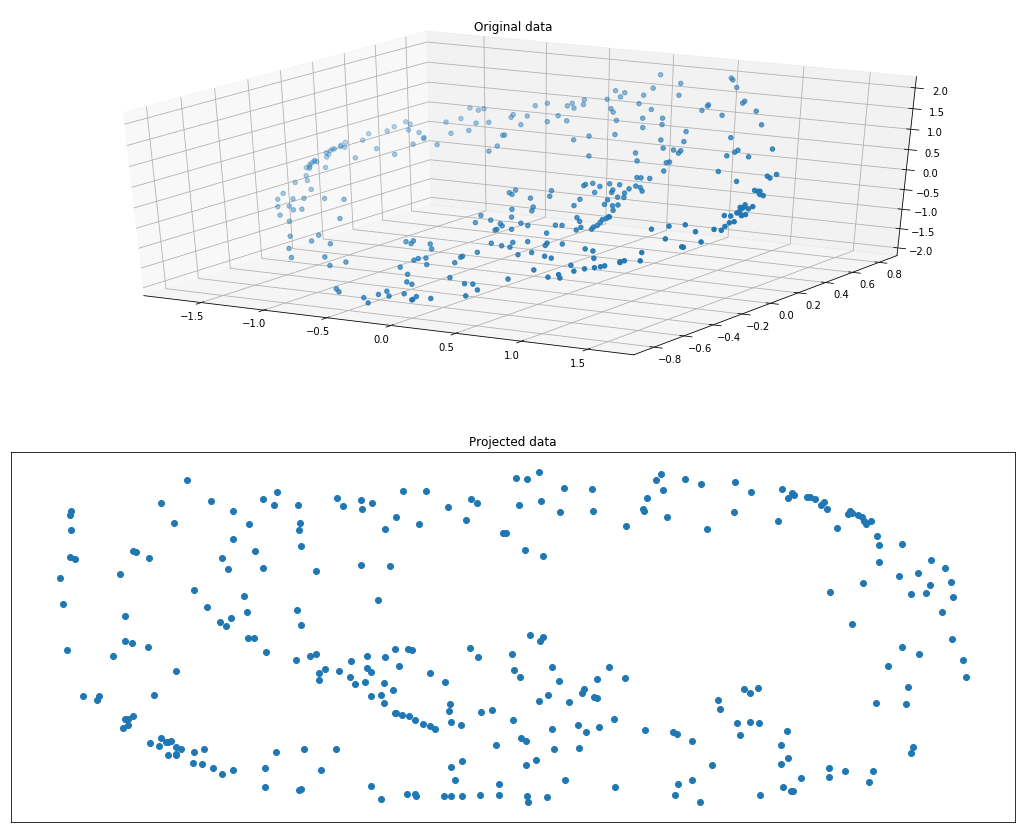

In [12]:
#----------------------------------------------------------------------
# Plot result

fig = plt.figure(figsize=(18,15))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(result[:, 0], result[:, 1], result[:, 2])

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(codings_val[:, 0], codings_val[:, 1])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

In [13]:
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
df = pd.read_csv(DATA_DIR / 'lorenz_system_std.csv' )
df_T = df.T

In [12]:
X_train = df[:int(df.shape[0]*0.7)]
X_test = df[int(df.shape[0]*0.7):]

In [14]:
X_train.shape[1]

25

In [15]:
AE = AutoencoderReduction(n_inputs=X_train.shape[1], n_hidden=10,n_outputs=X_train.shape[1], learning_rate=0.01)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
latent_rep, rec_pep =AE.fit_predict(epochs=100, training_set=X_train, test_set=X_test)

In [18]:
rec_pep

array([[ 1.6106155 , -1.9305197 , -1.6546545 , ...,  0.20920303,
        -0.63226473, -1.6615795 ],
       [ 0.24993682, -0.17074433, -0.04888524, ..., -0.0100095 ,
        -0.24306902, -0.12612201],
       [-0.92123866,  0.9726387 ,  1.0388359 , ...,  0.15066957,
        -0.15880892,  0.8484024 ],
       ...,
       [ 0.39103943, -0.79018116, -0.39886555, ...,  1.257479  ,
        -1.5667644 , -1.0857738 ],
       [-0.01302497, -0.39165777, -0.10793125, ...,  0.9353079 ,
        -0.9156146 , -0.64690644],
       [ 1.4177717 , -1.7384187 , -1.5047112 , ...,  0.43507573,
        -0.80527747, -1.639604  ]], dtype=float32)

In [20]:
import matplotlib.pyplot as plt

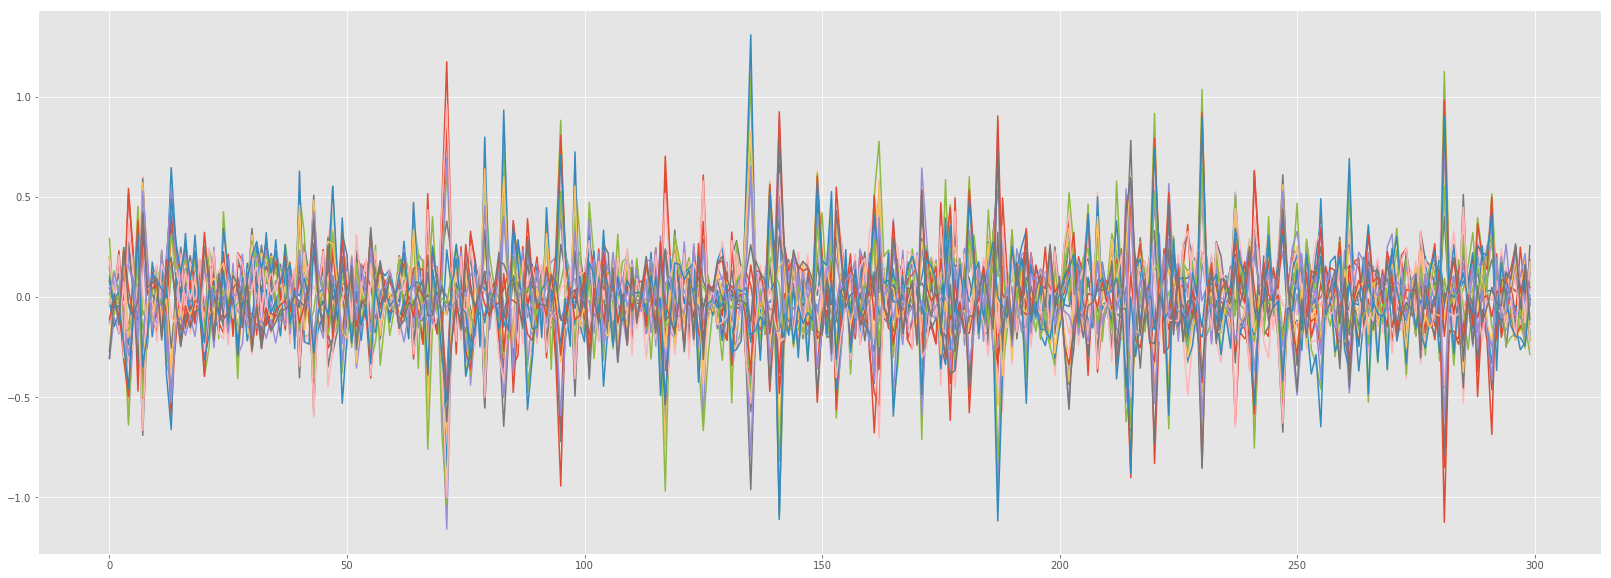

In [21]:
X=rec_pep.T
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    for i in np.arange(0,25):
        plt.plot(np.arange(300), X_test.values.T[i,:]-X[i,:])

In [ ]:
n_inputs, n_hidden, n_outputs, learning_rate

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.layers import fully_connected
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from path import Path
import pandas as pd

In [2]:
n_inputs = 28*28 #784
n_hiddens_1 = 300
n_hiddens_2 = 150
n_hiddens_3 = n_hiddens_1
n_outputs = n_inputs 

In [3]:
learning_rate = 0.01
l2_reg = 0.001

> tf.contrib.layers.variance_scaling_initializer: Restituisce un inizializzatore che genera tensori senza variare la scala.
Quando si inizializza una rete profonda, è in linea di principio vantaggioso mantenere costante la scala della varianza di input, quindi non esplode o diminuisce raggiungendo il livello finale. Questo inizializzatore utilizza la seguente formula


In [8]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
with tf.contrib.framework.arg_scope(
[fully_connected],
activation_fn=tf.nn.elu,
weights_initializer=tf.contrib.layers.variance_scaling_initializer(),
weights_regularizer=tf.contrib.layers.l2_regularizer(l2_reg)):
    hidden1 = fully_connected(X, n_hiddens_1)
    hidden2 = fully_connected(hidden1, n_hiddens_2) # codings
    hidden3 = fully_connected(hidden2, n_hiddens_3)
    outputs = fully_connected(hidden3, n_outputs, activation_fn=None)

In [10]:
recustruction_loss = tf.reduce_mean(tf.square(outputs-X))
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES) #????
loss = tf.add_n([recustruction_loss]+reg_losses) #implementa la loss function + la regolarizzazione L2

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

W1117 19:22:05.663965 140593968764736 deprecation.py:323] From <ipython-input-15-c50d5bb4a85c>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1117 19:22:05.664863 140593968764736 deprecation.py:323] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W1117 19:22:05.667768 140593968764736 deprecation.py:323] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contri

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz


W1117 19:22:06.120872 140593968764736 deprecation.py:323] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W1117 19:22:06.247983 140593968764736 deprecation.py:323] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [18]:
import sys

In [19]:
n_epochs = 5
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="") # not shown in the book
            sys.stdout.flush()                                          # not shown
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})   # not shown
        print("\r{}".format(epoch), "Train MSE:", loss_train)           # not shown
        saver.save(sess, "./my_model_all_layers.ckpt") 

0%

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_3' with dtype float and shape [?,784]
	 [[node Placeholder_3 (defined at <ipython-input-8-f81de04f646b>:1) ]]

Original stack trace for 'Placeholder_3':
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-f81de04f646b>", line 1, in <module>
    X = tf.placeholder(tf.float32, shape=[None, n_inputs])
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 2143, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 6262, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [21]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [22]:
reset_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 150  # codings
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.0001

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

he_init = tf.contrib.layers.variance_scaling_initializer() # He initialization
#Equivalent to:
#he_init = lambda shape, dtype=tf.float32: tf.truncated_normal(shape, 0., stddev=np.sqrt(2/shape[0]))
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer = partial(tf.layers.dense,
                         activation=tf.nn.elu,
                         kernel_initializer=he_init,
                         kernel_regularizer=l2_regularizer)

hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)
outputs = my_dense_layer(hidden3, n_outputs, activation=None)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver() # not shown in the book

W1117 19:27:13.857613 140593968764736 deprecation.py:323] From <ipython-input-22-38f2137ff133>:25: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


In [23]:
n_epochs = 5
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="") # not shown in the book
            sys.stdout.flush()                                          # not shown
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})   # not shown
        print("\r{}".format(epoch), "Train MSE:", loss_train)           # not shown
        saver.save(sess, "./my_model_all_layers.ckpt")    

0 Train MSE: 0.02991458
1 Train MSE: 0.014362694
2 Train MSE: 0.010577808
3 Train MSE: 0.011021891
4 Train MSE: 0.009938022


In [26]:
import matplotlib.pyplot as plt

In [29]:
def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")

In [32]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [33]:
def show_reconstructed_digits(X, outputs, model_path = None, n_test_digits = 2):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess, model_path)
        X_test = mnist.test.images[:n_test_digits]
        outputs_val = outputs.eval(feed_dict={X: X_test})

    fig = plt.figure(figsize=(8, 3 * n_test_digits))
    for digit_index in range(n_test_digits):
        plt.subplot(n_test_digits, 2, digit_index * 2 + 1)
        plot_image(X_test[digit_index])
        plt.subplot(n_test_digits, 2, digit_index * 2 + 2)
        plot_image(outputs_val[digit_index])

NameError: name 'os' is not defined

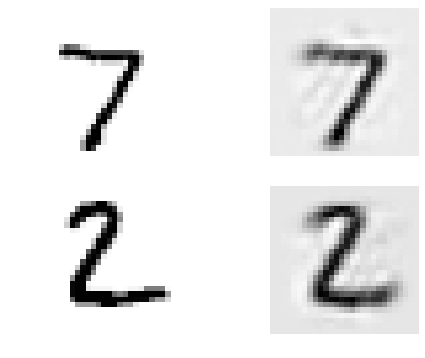

In [34]:
show_reconstructed_digits(X, outputs, "./my_model_all_layers.ckpt")
save_fig("reconstruction_plot")